In [2]:
# Python comments begin with '#'

import matplotlib.pyplot as plt   # Plotting library, renamed to 'plt'
import numpy as np                # Numeric and array library, renamed to 'np'
import pandas as pd               # Data loading and handling library, renamed to 'pd'
import seaborn as sns             # Fancy plotting libary, renamed to 'sns'

## Multiple Figures - plt.subplots

The easiest way to make multiple figures is to use **plt.subplots**. This is a flexible command and has different results depending on the layout of subfigures.

*Ref: https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html*

ax = <class 'matplotlib.axes._subplots.AxesSubplot'>


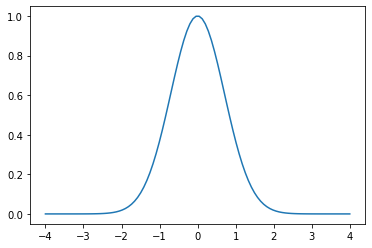

In [3]:
# ax is the Axes

xs = np.linspace(-4,4,100)
ys = np.exp(-xs**2)

fig, ax = plt.subplots()
print(f"ax = {type(ax)}")

ax.plot(xs,ys)


ax = <class 'numpy.ndarray'>


Text(0.5, 1.0, 'Axes 2')

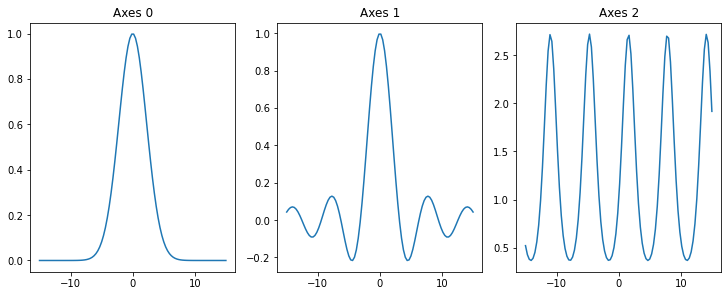

In [46]:
# axs is a list Axes
xs = np.linspace(-15,15,100)
ys1 = np.exp(-xs**2/10)
ys2 = np.sin(xs)/xs
ys3 = np.exp(np.sin(xs))

fig, axs = plt.subplots(ncols=3, figsize=(10,4), constrained_layout=True)
print(f"ax = {type(axs)}")
axs[0].plot(xs,ys1)
axs[1].plot(xs,ys2)
axs[2].plot(xs,ys3)

axs[0].set_title('Axes 0')
axs[1].set_title('Axes 1')
axs[2].set_title('Axes 2')

ax = <class 'matplotlib.axes._subplots.AxesSubplot'>


Text(0.5, 1.0, 'Axes 1 1, $\\sin(r^2/10)$')

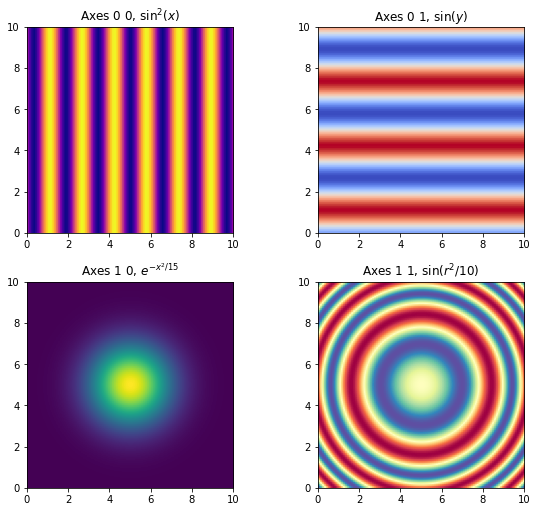

In [47]:
# ax is the Axes
xs = np.linspace(-10,10,100)
ys = np.linspace(-10,10,100)

xss,yss = np.meshgrid(xs,ys)

zss1 = np.sin(xss)**2
zss2 = np.sin(yss)
zss3 = np.exp(-(xss**2 + yss**2)/15)
zss4 = np.sin((xss**2 + yss**2)/10)

fig, axs = plt.subplots(nrows=2,ncols=2, figsize = (8,7), constrained_layout=True)
print(f"ax = {type(ax)}")

axs[0][0].imshow(zss1, cmap='plasma', extent=(0,10,0,10))
axs[0][1].imshow(zss2, cmap='coolwarm', extent=(0,10,0,10))
axs[1][0].imshow(zss3, extent=(0,10,0,10))
pos = axs[1][1].imshow(zss4, cmap='Spectral',extent=(0,10,0,10))

axs[0][0].set_title('Axes 0 0, $\sin^{2} (x)$')
axs[0][1].set_title('Axes 0 1, $\sin(y)$')
axs[1][0].set_title('Axes 1 0, $e^{-x^2/15}$')
axs[1][1].set_title('Axes 1 1, $\sin(r^2/10)$')

#fig.colorbar(pos, ax=axs[1][1])

## GridSpec

GridSpec allows moe customization of the grid.

*Ref: https://matplotlib.org/3.3.3/tutorials/intermediate/gridspec.html*

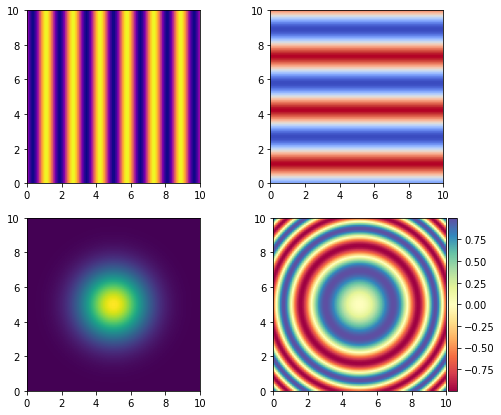

In [48]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(8,7))
#fig  = plt.figure()
#spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
spec = fig.add_gridspec(ncols=2,nrows=2)
f_ax0 = fig.add_subplot(spec[0, 0])
f_ax1 = fig.add_subplot(spec[0, 1])
f_ax2 = fig.add_subplot(spec[1, 0])
f_ax3 = fig.add_subplot(spec[1, 1])

f_ax0.imshow(zss1, cmap='plasma', extent=(0,10,0,10))
f_ax1.imshow(zss2, cmap='coolwarm', extent=(0,10,0,10))
f_ax2.imshow(zss3, extent=(0,10,0,10))
pos = f_ax3.imshow(zss4, cmap='Spectral',extent=(0,10,0,10))

fig.colorbar(pos, ax=f_ax3, fraction=0.05, pad=0.01)

<class 'matplotlib.image.AxesImage'>
Help on function tight_layout in module matplotlib.pyplot:

tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)
    Adjust the padding between and around subplots.
    
    Parameters
    ----------
    pad : float, default: 1.08
        Padding between the figure edge and the edges of subplots,
        as a fraction of the font size.
    h_pad, w_pad : float, default: *pad*
        Padding (height/width) between edges of adjacent subplots,
        as a fraction of the font size.
    rect : tuple (left, bottom, right, top), default: (0, 0, 1, 1)
        A rectangle in normalized figure coordinates into which the whole
        subplots area (including labels) will fit.



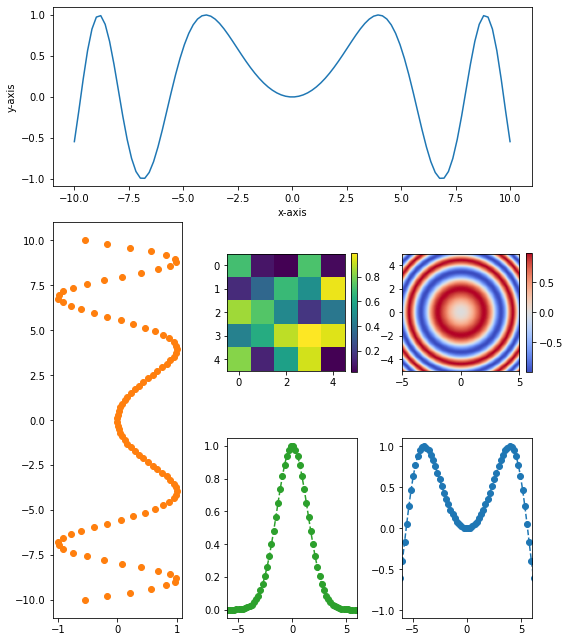

In [69]:
fig = plt.figure(figsize=(8,9))

xs = np.linspace(-10,10,100)
ys = np.linspace(-10,10,100)
xss,yss = np.meshgrid(xs,ys)

zs = np.sin(xs**2/10)
zss = np.sin((xss**2 + yss**2)/10)

gs = fig.add_gridspec(nrows=3, ncols=3)

ax0 = fig.add_subplot(gs[0,:])
ax0.plot(xs,zs)
ax0.set_xlabel("x-axis")
ax0.set_ylabel('y-axis')

ax1 = fig.add_subplot(gs[1,2])
pos = ax1.imshow(zss, extent=(-5,5,-5,5), cmap='coolwarm')
fig.colorbar(pos, ax=ax1, fraction=0.046, pad=0.05)
print(type(pos))

ax2 = fig.add_subplot(gs[1:,0])
ax2.scatter(zs,xs,color='C1')

rdata = np.random.rand(5,5)
ax3 = fig.add_subplot(gs[1,1])
pos = ax3.imshow(rdata)
fig.colorbar(pos, ax=ax3, fraction=0.046, pad=0.05)


ax4 = fig.add_subplot(gs[2,2])
ax4.plot(xs,zs,linestyle='--',marker='o')
ax4.set_xlim(-6,6)

ax5 = fig.add_subplot(gs[2,1])
ax5.plot(xs,np.exp(-xs**2/4),linestyle='--',marker='o',color='C2')
ax5.set_xlim(-6,6)

plt.tight_layout(pad=1, h_pad=0.5, w_pad=0.0)
help(plt.tight_layout)